In [1]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import anderson

In [2]:
seed(1)

In [3]:
# data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
#        6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9]
data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9]

(array([1., 1., 1., 7., 0., 1., 1., 2., 7., 2.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

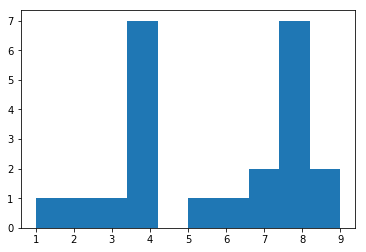

In [4]:
plt.hist(data)

In [5]:
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.890, p=0.016


In [6]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [7]:
result = anderson(data)
print('Statistic: %.3f' % result.statistic)

Statistic: 1.167


In [8]:
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.511, data does not look normal (reject H0)
10.000: 0.582, data does not look normal (reject H0)
5.000: 0.699, data does not look normal (reject H0)
2.500: 0.815, data does not look normal (reject H0)
1.000: 0.969, data does not look normal (reject H0)


In [9]:
normal = []
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        normal.append(1)
    else:
        normal.append(0)

In [10]:
if normal.count(1) >= 3:
    print('É normal')
else:
    print('Não é normal')

Não é normal
